## Notebook 6: 

This is an IPython notebook. Most of the code is composed of bash scripts, indicated by %%bash at the top of the cell, otherwise it is IPython code. This notebook includes code to download, assemble and analyze a published RADseq data set.

In [2]:
### Notebook 6
### Data set 6 (Finches)
### Authors: DaCosta & Sorenson (2016)
### Data Location: SRP059199

## Download the sequence data
Sequence data for this study are archived on the NCBI sequence read archive (SRA). Below I read in SraRunTable.txt for this project which contains all of the information we need to download the data. 

+ Project SRA: SRP059199
+ BioProject ID: PRJNA285779
+ Biosample numbers: SAMN03753600 - SAMN03753623
+ Runs: SRR2053224 -- SRR2053247
+ SRA link: http://trace.ncbi.nlm.nih.gov/Traces/study/?acc=SRP059199

In [2]:
%%bash
## make a new directory for this analysis
mkdir -p empirical_6/fastq/

#### For each ERS (individuals) get all of the ERR (sequence file accessions).

In [51]:
## IPython code
import pandas as pd
import numpy as np
import urllib2
import os

## open the SRA run table from github url
url = "https://raw.githubusercontent.com/"+\
      "dereneaton/RADmissing/master/empirical_6_SraRunTable.txt"
intable = urllib2.urlopen(url)
indata = pd.read_table(intable, sep="\t")

## print first few rows
print indata.head()

    BioSample_s Library_Name_s  MBases_l  MBytes_l  \
0  SAMN03753617         90.o31        77        49   
1  SAMN03753619         90.o38        84        54   
2  SAMN03753618         90.o50        83        55   
3  SAMN03753613         90.o53        74        46   
4  SAMN03753601           A056        70        44   

                        Organism_s       Run_s SRA_Sample_s  \
0                Vidua hypocherina  SRR2053224    SRS954896   
1                      Vidua regia  SRR2053225    SRS954895   
2                   Vidua fischeri  SRR2053226    SRS954894   
3                 Vidua orientalis  SRR2053227    SRS954893   
4  Lagonosticta senegala rhodopsis  SRR2053228    SRS954892   

                                  Sample_Name_s isolate_s Assay_Type_s  \
0              Vidua hypocherina, sample 90.o31    90.o31        OTHER   
1                    Vidua regia, sample 90.o38    90.o38        OTHER   
2                 Vidua fischeri, sample 90.o50    90.o50        OTHER   


In [4]:
def wget_download(SRR, outdir, outname):
    """ Python function to get sra data from ncbi and write to
    outdir with a new name using bash call wget """
    
    ## get output name
    output = os.path.join(outdir, outname+".sra")
    
    ## create a call string 
    call = "wget -q -r -nH --cut-dirs=9 -O "+output+" "+\
           "ftp://ftp-trace.ncbi.nlm.nih.gov/"+\
           "sra/sra-instant/reads/ByRun/sra/SRR/"+\
           "{}/{}/{}.sra;".format(SRR[:6], SRR, SRR)
        
    ## call bash script
    ! $call 

Here we pass the SRR number and the sample name to the `wget_download` function so that the files are saved with their sample names. 

In [5]:
for ID, SRR in zip(indata.Library_Name_s, indata.Run_s):
    wget_download(SRR, "empirical_6/fastq/", ID)

In [8]:
%%bash
## convert sra files to fastq using fastq-dump tool
## output as gzipped into the fastq directory
fastq-dump --gzip -O empirical_6/fastq/ empirical_6/fastq/*.sra

## remove .sra files
rm empirical_6/fastq/*.sra

Read 889818 spots for empirical_6/fastq/90.o31.sra
Written 889818 spots for empirical_6/fastq/90.o31.sra
Read 1012887 spots for empirical_6/fastq/90.o38.sra
Written 1012887 spots for empirical_6/fastq/90.o38.sra
Read 998161 spots for empirical_6/fastq/90.o50.sra
Written 998161 spots for empirical_6/fastq/90.o50.sra
Read 862619 spots for empirical_6/fastq/90.o53.sra
Written 862619 spots for empirical_6/fastq/90.o53.sra
Read 792799 spots for empirical_6/fastq/A056.sra
Written 792799 spots for empirical_6/fastq/A056.sra
Read 833981 spots for empirical_6/fastq/A081.sra
Written 833981 spots for empirical_6/fastq/A081.sra
Read 809186 spots for empirical_6/fastq/A082.sra
Written 809186 spots for empirical_6/fastq/A082.sra
Read 939649 spots for empirical_6/fastq/A089.sra
Written 939649 spots for empirical_6/fastq/A089.sra
Read 1020850 spots for empirical_6/fastq/A107.sra
Written 1020850 spots for empirical_6/fastq/A107.sra
Read 1001743 spots for empirical_6/fastq/A145.sra
Written 1001743 spots

In [9]:
%%bash
ls -l empirical_6/fastq/

total 1668628
-rw-rw-r-- 1 deren deren 69481962 Nov 23 13:13 90.o31.fastq.gz
-rw-rw-r-- 1 deren deren 75367262 Nov 23 13:13 90.o38.fastq.gz
-rw-rw-r-- 1 deren deren 76680615 Nov 23 13:13 90.o50.fastq.gz
-rw-rw-r-- 1 deren deren 66086600 Nov 23 13:13 90.o53.fastq.gz
-rw-rw-r-- 1 deren deren 62055035 Nov 23 13:13 A056.fastq.gz
-rw-rw-r-- 1 deren deren 64828556 Nov 23 13:13 A081.fastq.gz
-rw-rw-r-- 1 deren deren 63527984 Nov 23 13:13 A082.fastq.gz
-rw-rw-r-- 1 deren deren 73811356 Nov 23 13:13 A089.fastq.gz
-rw-rw-r-- 1 deren deren 79426948 Nov 23 13:13 A107.fastq.gz
-rw-rw-r-- 1 deren deren 78226977 Nov 23 13:13 A145.fastq.gz
-rw-rw-r-- 1 deren deren 56867082 Nov 23 13:13 A147.fastq.gz
-rw-rw-r-- 1 deren deren 67136950 Nov 23 13:13 A167.fastq.gz
-rw-rw-r-- 1 deren deren 54625508 Nov 23 13:13 A177.fastq.gz
-rw-rw-r-- 1 deren deren 68861314 Nov 23 13:13 A1794.fastq.gz
-rw-rw-r-- 1 deren deren 70348288 Nov 23 13:13 A204.fastq.gz
-rw-rw-r-- 1 deren deren 72142052 Nov 23 13:14 A248.fastq.gz
-

#### Merge technical replicates
This study includes several technical replicates per sequenced individuals, which we combine into a single file for each individual here. 

## Make a params file

In [10]:
%%bash
pyrad --version

pyRAD 3.0.63


In [11]:
%%bash
## remove old params file if it exists
rm params.txt 

## create a new default params file
pyrad -n 

	new params.txt file created


#### Note: 
The data here are from Illumina Casava <1.8, so the phred scores are offset by 64 instead of 33, so we use that in the params file below.

In [8]:
%%bash
## substitute new parameters into file
sed -i '/## 1. /c\empirical_6/           ## 1. working directory ' params.txt
sed -i '/## 6. /c\CCTGCAGG,AATTC         ## 6. cutters ' params.txt
sed -i '/## 7. /c\20                     ## 7. N processors      ' params.txt
sed -i '/## 9. /c\6                      ## 9. NQual             ' params.txt
sed -i '/## 10./c\.85                    ## 10. clust threshold  ' params.txt
sed -i '/## 12./c\4                      ## 12. MinCov           ' params.txt
sed -i '/## 13./c\10                     ## 13. maxSH            ' params.txt
sed -i '/## 14./c\empirical_6_m4          ## 14. output name      ' params.txt
sed -i '/## 18./c\empirical_6/fastq/*.gz ## 18. data location    ' params.txt
sed -i '/## 29./c\2,2                    ## 29. trim overhang    ' params.txt
sed -i '/## 30./c\p,n,s                  ## 30. output formats   ' params.txt

In [9]:
cat params.txt

==** parameter inputs for pyRAD version 3.0.63  **======================== affected step ==
empirical_6/           ## 1. working directory 
./*.fastq.gz              ## 2. Loc. of non-demultiplexed files (if not line 18)  (s1)
./*.barcodes              ## 3. Loc. of barcode file (if not line 18)             (s1)
vsearch                   ## 4. command (or path) to call vsearch (or usearch)    (s3,s6)
muscle                    ## 5. command (or path) to call muscle                  (s3,s7)
CCTGCAGG,AATTC         ## 6. cutters 
20                     ## 7. N processors      
6                         ## 8. Mindepth: min coverage for a cluster              (s4,s5)
6                      ## 9. NQual             
.85                    ## 10. clust threshold  
rad                       ## 11. Datatype: rad,gbs,pairgbs,pairddrad,(others:see docs)(all)
4                      ## 12. MinCov           
10                     ## 13. maxSH            
empirical_6_m4          ## 14. output name    

## Assemble in _pyrad_


In [ ]:
%%bash
pyrad -p params.txt -s 234567 >> log.txt 2>&1  

In [33]:
%%bash
sed -i '/## 12./c\2                    ## 12. MinCov           ' params.txt
sed -i '/## 14./c\empirical_6_m2       ## 14. output name      ' params.txt

In [35]:
%%bash
pyrad -p params.txt -s 7 >> log.txt 2>&1  

## Results
We are interested in the relationship between the amount of input (raw) data between any two samples, the average coverage they recover when clustered together, and the phylogenetic distances separating samples.  

#### Raw data amounts
The average number of raw reads per sample is 1.36M.

In [2]:
import pandas as pd
## read in the data
s2dat = pd.read_table("empirical_6/stats/s2.rawedit.txt", header=0, nrows=25)

## print summary stats
print s2dat["passed.total"].describe()

## find which sample has the most raw data
maxraw = s2dat["passed.total"].max()
print "\nmost raw data in sample:"
print s2dat['sample '][s2dat['passed.total']==maxraw]

count        24.000000
mean     609459.416667
std      114564.902701
min      472250.000000
25%      531561.250000
50%      593659.500000
75%      648491.250000
max      961219.000000
Name: passed.total, dtype: float64

most raw data in sample:
18    JMD1285
Name: sample , dtype: object


### Look at distributions of coverage
pyrad v.3.0.63 outputs depth information for each sample which I read in here and plot. First let's ask which sample has the highest depth of coverage. The std of coverages is pretty low in this data set compared to several others. 

In [14]:
## read in the s3 results
s6dat = pd.read_table("empirical_6/stats/s3.clusters.txt", header=0, nrows=25)

## print summary stats
print "summary of means\n=================="
print s6dat['dpt.me'].describe()

## print summary stats
print "\nsummary of std\n=================="
print s6dat['dpt.sd'].describe()

## print summary stats
print "\nsummary of proportion lowdepth\n=================="
print pd.Series(1-s6dat['d>5.tot']/s6dat["total"]).describe()

## find which sample has the greatest depth of retained loci
max_hiprop = (s6dat["d>5.tot"]/s6dat["total"]).max()
print "\nhighest coverage in sample:"
print s6dat['taxa'][s6dat['d>5.tot']/s6dat["total"]==max_hiprop]

summary of means
count    24.000000
mean     38.139250
std       5.881965
min      28.454000
25%      33.512000
50%      37.240000
75%      41.636500
max      53.215000
Name: dpt.me, dtype: float64

summary of std
count     24.000000
mean     112.613125
std       46.878437
min       70.168000
25%       85.451500
50%       96.007500
75%      121.462750
max      241.616000
Name: dpt.sd, dtype: float64

summary of proportion lowdepth
count    24.000000
mean      0.458336
std       0.074790
min       0.308587
25%       0.416855
50%       0.463149
75%       0.526700
max       0.572036
dtype: float64

highest coverage in sample:
11    A167
Name: taxa, dtype: object


In [16]:
import numpy as np
## print mean and std of coverage for the highest coverage sample
with open("empirical_6/clust.85/A167.depths", 'rb') as indat:
    depths = np.array(indat.read().strip().split(","), dtype=int)
    
print depths.mean(), depths.std()

41.6207345663 129.154402626


#### Plot the coverage for the sample with highest mean coverage
Green shows the loci that were discarded and orange the loci that were retained. The majority of data were discarded for being too low of coverage. 

In [19]:
import toyplot
import toyplot.svg
import numpy as np

## read in the depth information for this sample
with open("empirical_6/clust.85/A167.depths", 'rb') as indat:
    depths = np.array(indat.read().strip().split(","), dtype=int)
    
## make a barplot in Toyplot
canvas = toyplot.Canvas(width=350, height=300)
axes = canvas.axes(xlabel="Depth of coverage (N reads)", 
                   ylabel="N loci", 
                   label="dataset6/sample=A167")

## select the loci with depth > 5 (kept)
keeps = depths[depths>5]

## plot kept and discarded loci
edat = np.histogram(depths, range(30)) # density=True)
kdat = np.histogram(keeps, range(30)) #, density=True)
axes.bars(edat)
axes.bars(kdat)

#toyplot.svg.render(canvas, "empirical_6_depthplot.svg")

### Print final stats table

In [36]:
cat empirical_6/stats/empirical_6_m4.stats




13093       ## loci with > minsp containing data
13093       ## loci with > minsp containing data & paralogs removed
12864       ## loci with > minsp containing data & paralogs removed & final filtering

## number of loci recovered in final data set for each taxon.
taxon	nloci
90.o31 	6706
90.o38 	6694
90.o50 	6490
90.o53 	7132
A056   	5731
A081   	7098
A082   	7229
A089   	6918
A107   	6255
A145   	6608
A147   	6797
A167   	6015
A177   	7009
A1794  	4790
A204   	6040
A248   	6077
A328   	5912
JMD1249	7054
JMD1285	6707
MDS004 	7271
MDS054 	5489
MDS065 	6500
NKK511 	7033
SAR6894	4845


## nloci = number of loci with data for exactly ntaxa
## ntotal = number of loci for which at least ntaxa have data
ntaxa	nloci	saved	ntotal
1	-
2	-		-
3	-		-
4	1345	*	12864
5	844	*	11519
6	886	*	10675
7	658	*	9789
8	695	*	9131
9	878	*	8436
10	998	*	7558
11	455	*	6560
12	567	*	6105
13	1175	*	5538
14	847	*	4363
15	268	*	3516
16	205	*	3248
17	209	*	3043
18	223	*	2834
19	232	*	2611
20	281	*	2379
21	361	*	2

In [5]:
%%bash
head -n 20 empirical_6/stats/empirical_6_m2.stats



17797       ## loci with > minsp containing data
17797       ## loci with > minsp containing data & paralogs removed
17477       ## loci with > minsp containing data & paralogs removed & final filtering

## number of loci recovered in final data set for each taxon.
taxon	nloci
90.o31 	6934
90.o38 	7055
90.o50 	6786
90.o53 	7440
A056   	6719
A081   	7315
A082   	7503
A089   	7430
A107   	6794
A145   	7235
A147   	7216
A167   	7098


## Infer ML phylogeny in _raxml_ as an unrooted tree

In [ ]:
%%bash
## raxml argumement w/ ...
raxmlHPC-PTHREADS-AVX -f a -m GTRGAMMA -N 100 -x 12345 -p 12345 -T 20 \
                      -w /home/deren/Documents/RADmissing/empirical_6/ \
                      -n empirical_6_m4 -s empirical_6/outfiles/empirical_6_m4.phy
                      

In [ ]:
%%bash
## raxml argumement w/ ...
raxmlHPC-PTHREADS-AVX -f a -m GTRGAMMA -N 100 -x 12345 -p 12345 -T 20 \
                      -w /home/deren/Documents/RADmissing/empirical_6/ \
                      -n empirical_6_m2 -s empirical_6/outfiles/empirical_6_m2.phy
                      

In [38]:
%%bash 
head -n 20 empirical_6/RAxML_info.empirical_6_m4



This is RAxML version 8.0.16 released by Alexandros Stamatakis on March 21 2014.

With greatly appreciated code contributions by:
Andre Aberer      (HITS)
Simon Berger      (HITS)
Alexey Kozlov     (HITS)
Nick Pattengale   (Sandia)
Wayne Pfeiffer    (SDSC)
Akifumi S. Tanabe (NRIFS)
David Dao         (KIT)
Charlie Taylor    (UF)


Alignment has 83996 distinct alignment patterns

Proportion of gaps and completely undetermined characters in this alignment: 50.46%

RAxML rapid bootstrapping and subsequent ML search


In [ ]:
%%bash 
head -n 20 empirical_6/RAxML_info.empirical_6_m2

### Plot the tree in R using `ape`


In [10]:
%load_ext rpy2.ipython

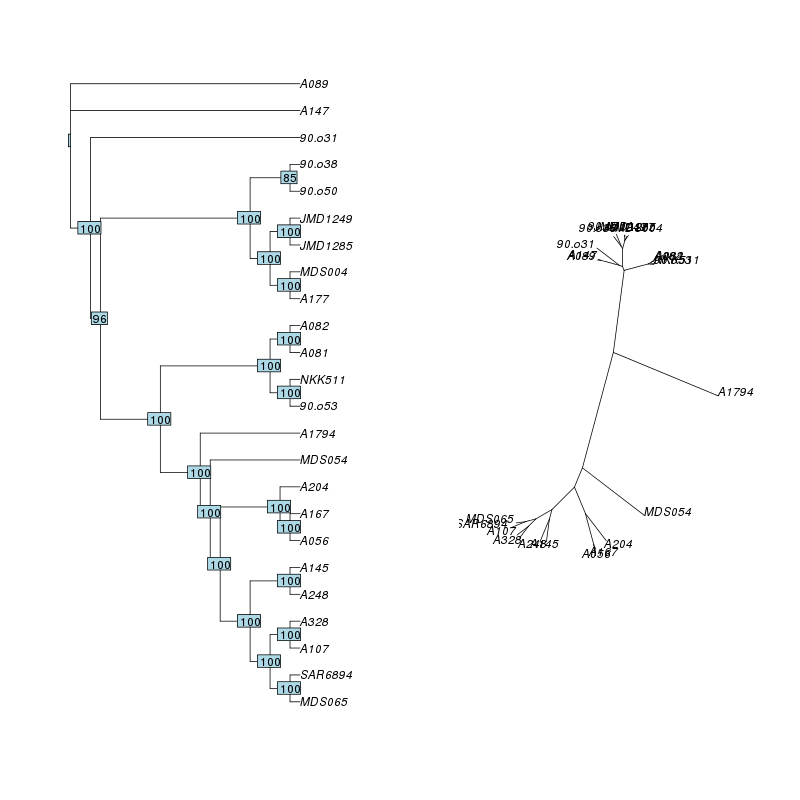

In [12]:
%%R -h 800 -w 800
library(ape)
tre <- read.tree("empirical_6/RAxML_bipartitions.empirical_6")
ltre <- ladderize(tre)

par(mfrow=c(1,2))
plot(ltre, use.edge.length=F)
nodelabels(ltre$node.label)

plot(ltre, type='u')

### Get phylo distances (GTRgamma dist)

In [13]:
%%R
mean(cophenetic.phylo(ltre))

[1] 0.04078121


### Translation to taxon names

In [49]:
print pd.DataFrame([indata.Library_Name_s, indata.Organism_s]).T

   Library_Name_s                        Organism_s
0          90.o31                 Vidua hypocherina
1          90.o38                       Vidua regia
2          90.o50                    Vidua fischeri
3          90.o53                  Vidua orientalis
4            A056   Lagonosticta senegala rhodopsis
5            A081                  Vidua paradisaea
6            A082                      Vidua obtusa
7            A089                    Vidua macroura
8            A107          Lagonosticta rhodopareia
9            A145              Lagonosticta larvata
10           A147                    Vidua macroura
11           A167    Lagonosticta senegala rendalli
12           A177                  Vidua chalybeata
13          A1794             Anomalospiza imberbis
14           A204            Lagonosticta rufopicta
15           A248                 Lagonosticta rara
16           A328     Lagonosticta sanguinodorsalis
17        JMD1249                Vidua purpurascens
18        JM